In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload() # Commented out for privacy

Saving kaggle-4.json to kaggle-4.json


{'kaggle-4.json': b'{"username":"ray0911","key":"7e734715b127af6053c1a48387c496e9"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle-4.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/the-kvasir-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.32G/2.32G [00:11<00:00, 210MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/the-kvasir-dataset/versions/1


In [5]:
!cp -r /root/.cache/kagglehub/datasets/yasserhessein/the-kvasir-dataset/versions/1 /content/kvasir-dataset

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np

GPU is not available.


In [9]:
dataset_path = '/content/kvasir-dataset/kvasir-dataset-v2'
categories = os.listdir(dataset_path)
image_count = {}
image_dimensions = {}

In [10]:
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    image_count[category] = len(image_files)
    sample_image_path = os.path.join(category_path, image_files[0])
    with Image.open(sample_image_path) as img:
        image_dimensions[category] = img.size  # (width, height)

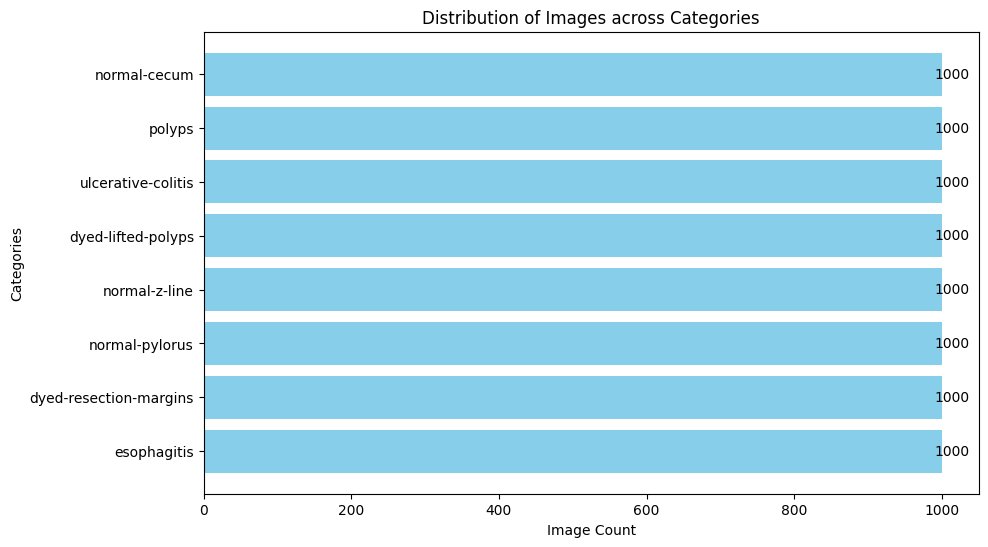

In [11]:
# Plot the distribution of images in each folder
categories_sorted = sorted(image_count.items(), key=lambda x: x[1], reverse=True)
category_names = [x[0] for x in categories_sorted]
category_counts = [x[1] for x in categories_sorted]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(category_names, category_counts, color='skyblue')

ax.set_xlabel('Image Count')
ax.set_ylabel('Categories')
ax.set_title('Distribution of Images across Categories')
for bar in bars:
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height() / 2, str(bar.get_width()),
            va='center', color='black', fontsize=10)

plt.show()

In [12]:
for category in categories:
    print(f"Category: {category}, Count: {image_count[category]}, Dimensions: {image_dimensions[category]}")

Category: esophagitis, Count: 1000, Dimensions: (1280, 1024)
Category: dyed-resection-margins, Count: 1000, Dimensions: (720, 576)
Category: normal-pylorus, Count: 1000, Dimensions: (1280, 1024)
Category: normal-z-line, Count: 1000, Dimensions: (1920, 1072)
Category: dyed-lifted-polyps, Count: 1000, Dimensions: (720, 576)
Category: ulcerative-colitis, Count: 1000, Dimensions: (720, 576)
Category: polyps, Count: 1000, Dimensions: (720, 576)
Category: normal-cecum, Count: 1000, Dimensions: (720, 576)


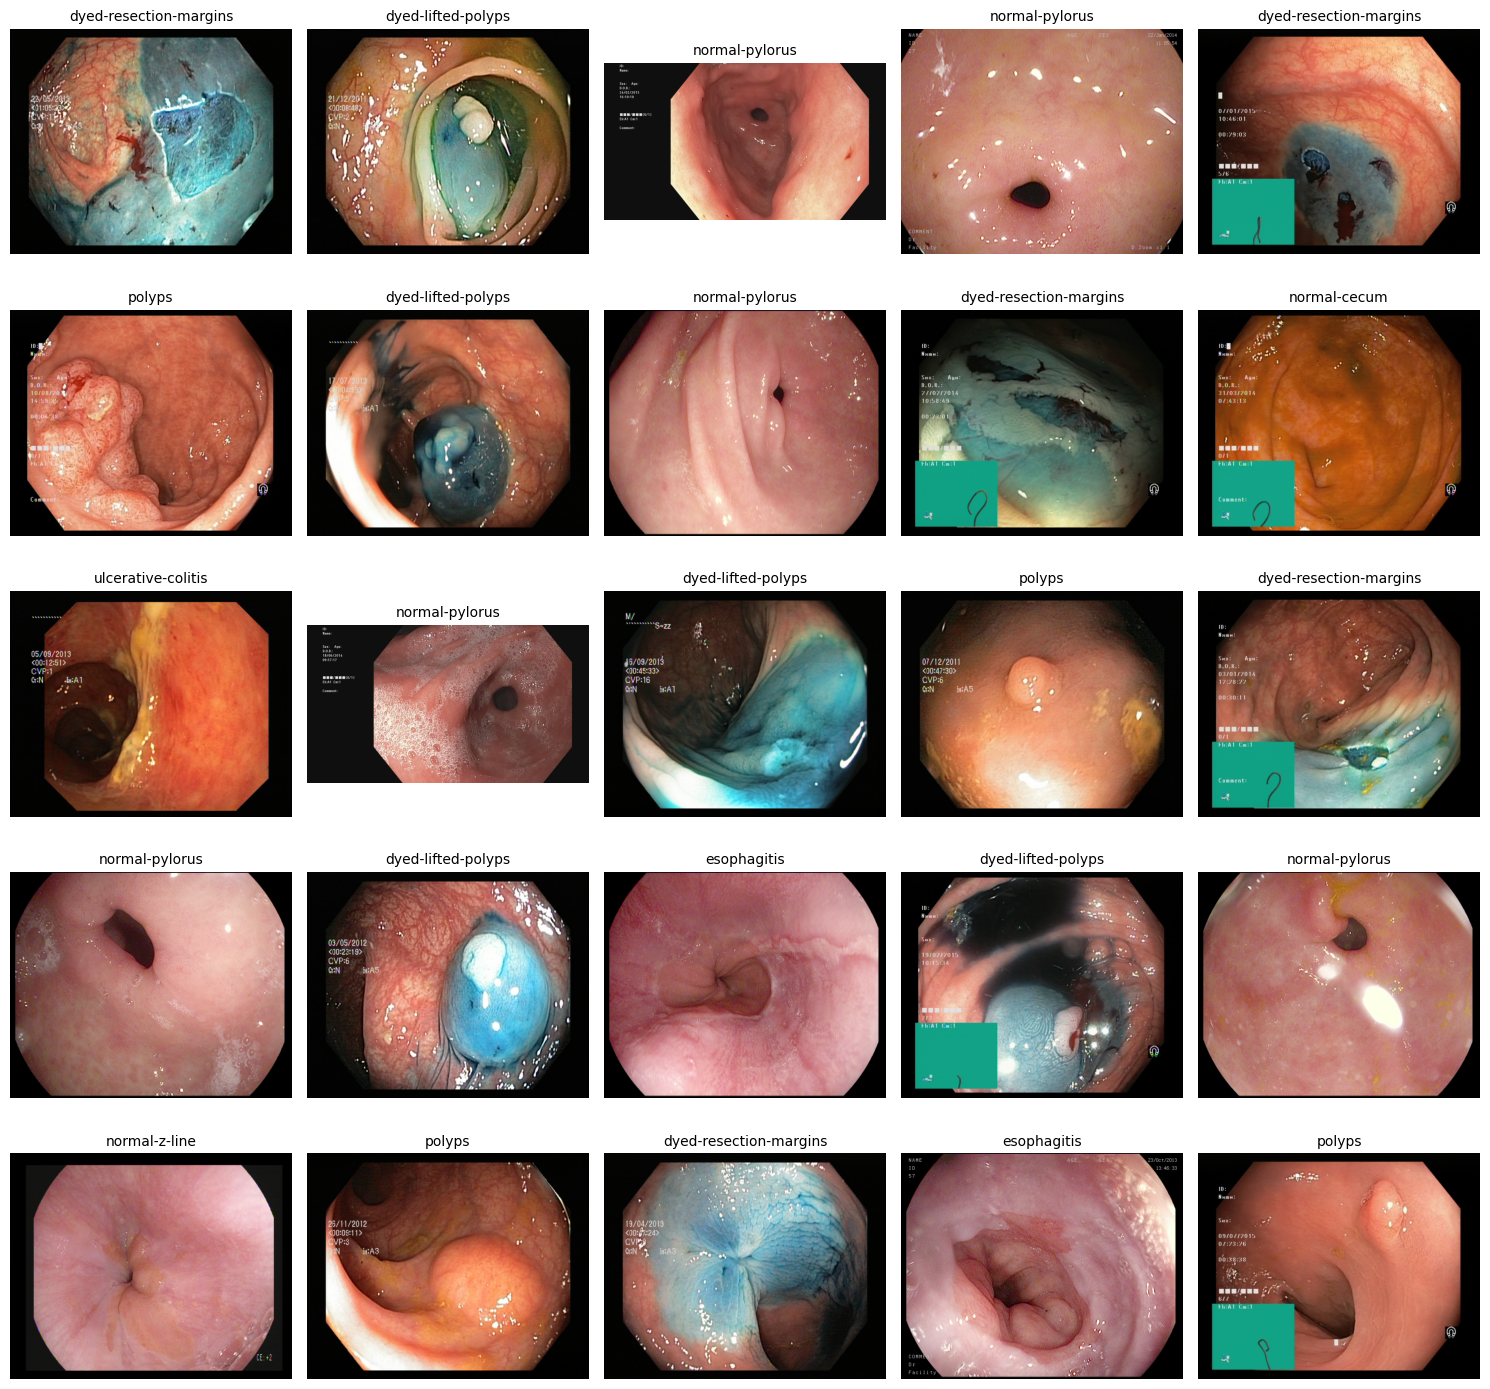

In [13]:
import random
from PIL import Image
num_images_to_display = 25

# Collect all image paths and their categories in the dataset
image_paths_and_labels = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    for image_file in image_files:
        image_paths_and_labels.append((os.path.join(category_path, image_file), category))

random_images_and_labels = random.sample(image_paths_and_labels, num_images_to_display)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid
axes = axes.flatten()

# Loop through the selected images and display them with their category labels
for i, (image_path, label) in enumerate(random_images_and_labels):
    with Image.open(image_path) as img:
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide axes for cleaner display
        axes[i].set_title(label, fontsize=10)  # Set label as title for each image

# Set the title for the whole plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust title spacing
plt.show()

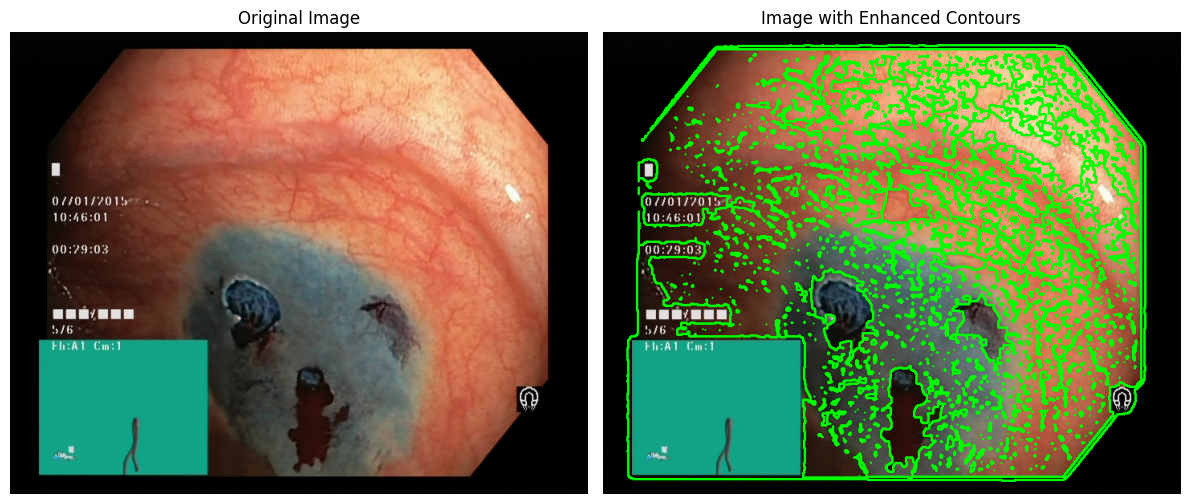

In [14]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

random_image_path, _ = random.choice(random_images_and_labels)
img_bgr = cv2.imread(random_image_path)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)# Gray Scale

# Apply GaussianBlur to reduce noise (a bit stronger blur)
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)

# Use Adaptive Thresholding to enhance edge detection
img_threshold = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY_INV, 11, 2)
# Apply morphological transformations to clean up the image
kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(img_threshold, kernel, iterations=1)
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)
# Find contours using the processed image
contours, _ = cv2.findContours(img_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img_bgr.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # Green contours with thickness 2

# Convert the image with contours to RGB for displaying with Matplotlib
img_contours_rgb = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_contours_rgb)
plt.title('Image with Enhanced Contours')
plt.axis('off')

plt.tight_layout()
plt.show()

**BACKGROUND REMOVAL**

In [16]:
!pip install rembg onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 162GB/s]


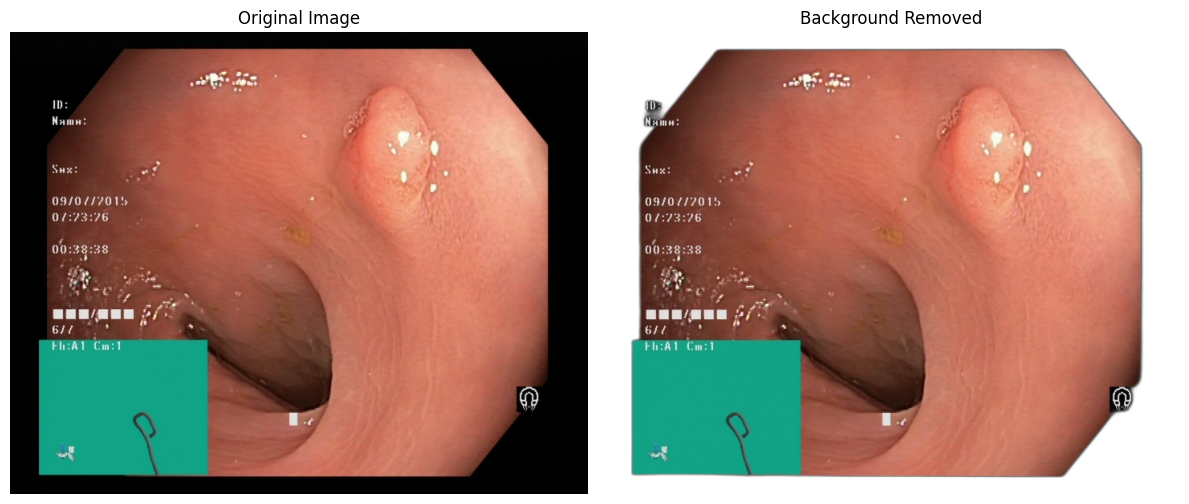

In [17]:
from rembg import remove
random_image_path, _ = random.choice(random_images_and_labels)
img_bgr = cv2.imread(random_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
output = remove(img_rgb)
output_bgr = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Background Removed')
plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def process_image(input_image_path):
    if not os.path.exists(input_image_path):
        print(f"Error: Image not found at {input_image_path}")
        return

    # Step 1: Read the image (in color)
    img_bgr = cv2.imread(input_image_path)
    if img_bgr is None:
        print(f"Error: Could not load image at {input_image_path}")
        return

    # Step 2: Convert to grayscale for thresholding (we'll use the grayscale version for segmentation)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Thresholding (simulating skin surface selection)
    _, thresholded = cv2.threshold(img_gray, 110, 255, cv2.THRESH_BINARY)

    # Step 4: Remove small noise speckles using the 'Islands' effect (connected components)
    num_labels, labels = cv2.connectedComponents(thresholded)

    # Find the largest connected component
    largest_label = 1 + np.argmax(np.bincount(labels.flat)[1:])  # Exclude background (label 0)

    # Create a mask for the largest connected component
    largest_component_mask = (labels == largest_label).astype(np.uint8) * 255

    # Step 5: Mask the original color image to keep only the largest component (foreground)
    # Convert the mask into 3 channels (RGB)
    mask_rgb = cv2.merge([largest_component_mask] * 3)

    # Apply the mask on the original color image
    foreground = cv2.bitwise_and(img_bgr, mask_rgb)

    # Step 6: Optional - Apply smoothing or further adjustments (using median blur, for example)
    smoothed_segment = cv2.medianBlur(foreground, 5)

    # Plot the images: original, thresholded, and processed result
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Thresholded Image
    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    # Final Processed Image (foreground with color preserved)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(smoothed_segment, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image (Foreground with Color)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
input_image_path = '/content/kvasir-dataset/kvasir-dataset-v2/normal-z-line/00bee375-36d2-4ba9-89e5-bd6132d79c0c.jpg'
process_image(input_image_path)

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directories for the dataset
base_dir = '/content/kvasir-dataset/kvasir-dataset-v2'

# Create the main directories for the split datasets if they do not exist
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# Create the directories for training, validation, and testing if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each class folder
for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)

    # Check if it's a directory (class folder)
    if os.path.isdir(class_path):
        # Create subdirectories in train, val, and test
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

        # Get all image file paths in the current class folder
        images = os.listdir(class_path)
        num_images = len(images)

        # Split into 70% training, 15% validation, and 15% test
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

        # Move images into the respective directories (train, val, test)
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_folder, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_folder, img))
        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_folder, img))

# Now the directories are set up correctly and images have been copied
print("Dataset successfully split into train, val, and test directories.")

Dataset successfully split into train, val, and test directories.


In [20]:
for class_folder in os.listdir(train_dir):
    if os.path.isdir(os.path.join(train_dir, class_folder)):
        train_images = len(os.listdir(os.path.join(train_dir, class_folder)))
        val_images = len(os.listdir(os.path.join(val_dir, class_folder)))
        test_images = len(os.listdir(os.path.join(test_dir, class_folder)))
        print(f"Class: {class_folder}")
        print(f"Train images: {train_images}")
        print(f"Validation images: {val_images}")
        print(f"Test images: {test_images}")
        print("-" * 30)

Class: esophagitis
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: dyed-resection-margins
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: normal-pylorus
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: normal-z-line
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: dyed-lifted-polyps
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: ulcerative-colitis
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: polyps
Train images: 700
Validation images: 150
Test images: 150
------------------------------
Class: normal-cecum
Train images: 700
Validation images: 150
Test images: 150
------------------------------


In [21]:

# Set image height and width
img_height = 224
img_width = 224
batch_size = 32
# Split the dataset into training and validation sets with correct batch size and image size
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Found 8000 files belonging to 8 classes.
Using 1600 files for validation.
Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [22]:
# Prepare normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the datasets
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Display the normalized pixel values
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [23]:
# AUTOTUNE for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [24]:
# Model definition using InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model1 = InceptionV3(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False

x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions1 = Dense(8, activation='softmax')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

87910968/87910968 [==============================] - 0s 0us/step


In [25]:
# Model definition using VGG16
from tensorflow.keras.applications import VGG16
base_model2 = VGG16(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False

x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions2 = Dense(8, activation='softmax')(x)
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)

58889256/58889256 [==============================] - 0s 0us/step


In [26]:
model1.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model2.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Update the model filepath to use the .keras extension
model_filepath = "/content/model-{epoch:02d}-{val_accuracy:.4f}.keras"

checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [29]:
history1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.8080 - accuracy: 0.6842 
Epoch 1: val_accuracy improved from -inf to 0.39937, saving model to /content/model-01-0.3994.keras
200/200 [==============================] - 2480s 12s/step - loss: 0.8080 - accuracy: 0.6842 - val_loss: 3.1087 - val_accuracy: 0.3994
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.5283 - accuracy: 0.8048 
Epoch 2: val_accuracy improved from 0.39937 to 0.62000, saving model to /content/model-02-0.6200.keras
200/200 [==============================] - 2456s 12s/step - loss: 0.5283 - accuracy: 0.8048 - val_loss: 1.1204 - val_accuracy: 0.6200
Epoch 3/5
200/200 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.8375 
Epoch 3: val_accuracy improved from 0.62000 to 0.76812, saving model to /content/model-03-0.7681.keras
200/200 [==============================] - 2453s 12s/step - loss: 0.4360 - accuracy: 0.8375 - val_loss: 0.7606 - val_accuracy: 0.7681
Epoc

In [30]:
model1.save('model1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


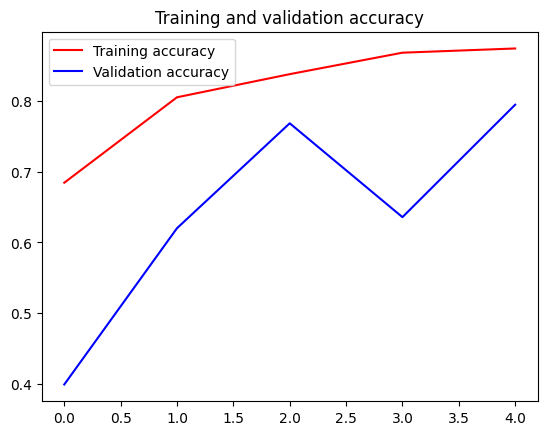

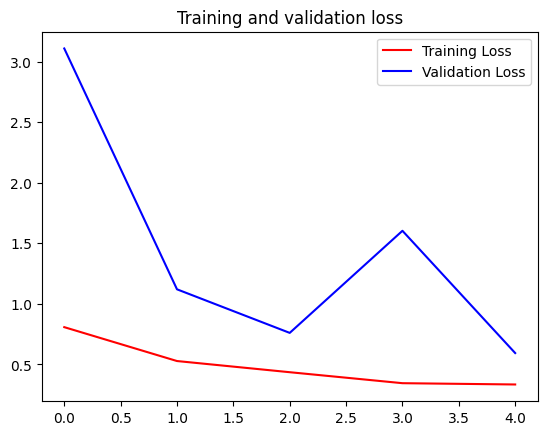

In [31]:
# Plot training and validation accuracy/loss for model1
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',  
    patience=2,           
    restore_best_weights=True,
    verbose=1
)

In [34]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load EfficientNetB3 as the base model
base_model2 = EfficientNetB3(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False

# Add custom layers on top
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions2 = Dense(8, activation='softmax')(x)

# Define the model
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)


43941136/43941136 [==============================] - 0s 0us/step


In [35]:
model2.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    callbacks=[checkpoint,early_stop]
)


Epoch 1/3
  1/200 [..............................] - ETA: 3:01:17 - loss: 2.0193 - accuracy: 0.1250

In [ ]:
model2.save('model2.h5')

In [ ]:
# Plot training and validation accuracy/loss for model2
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model_1 = load_model('/content/model1.h5')
model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='model_1')

model_2 = load_model('/content/model2.h5')
model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='model_2')

models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

history = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

In [ ]:
# Plot training and validation accuracy/loss for ensemble model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Prepare labels for evaluation
train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in val_ds], axis=0)
print(test_label.shape)